In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [3]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

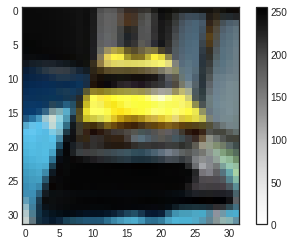

In [4]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [5]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape([-1, 3072])
x_val = x_val.reshape([-1, 3072])
x_test = x_test.reshape([-1, 3072])

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [7]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [8]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(4096, input_shape=[3072], kernel_initializer='glorot_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2048, kernel_initializer='glorot_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, kernel_initializer='glorot_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, kernel_initializer='glorot_uniform', activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              12587008  
_________________________________________________________________
batch_normalization (BatchNo (None, 4096)              16384     
_________________________________________________________________
activation (Activation)      (None, 4096)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_1 (Activation)    (None, 2048)              0

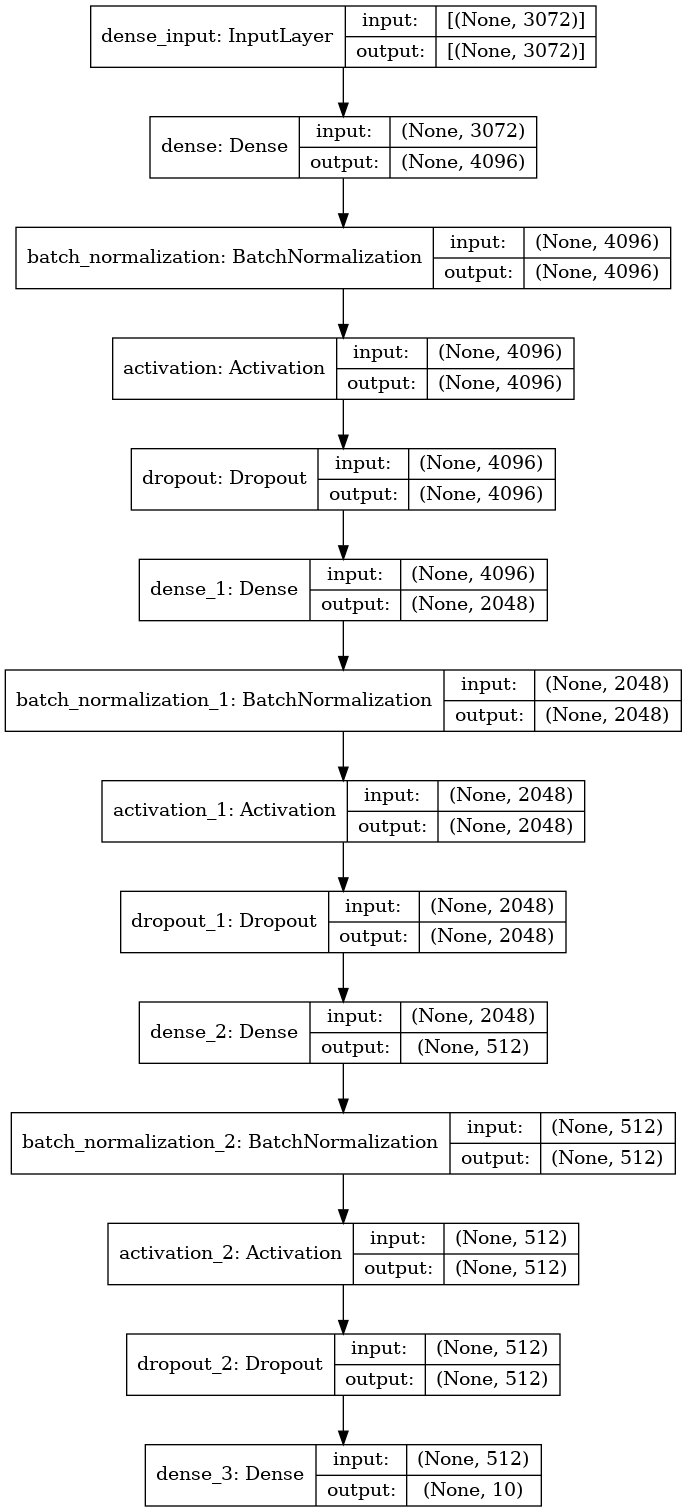

In [10]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

In [11]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

checkpoint_cb = callbacks.ModelCheckpoint('cifar10_model.h5', save_best_only=True)
earlystopping_cb = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=200, validation_data=(x_val, y_val), 
          callbacks=[checkpoint_cb, earlystopping_cb])

Epoch 1/200
1250/1250 [==============================] - 16s 12ms/step - loss: 1.9085 - accuracy: 0.3267 - val_loss: 1.8077 - val_accuracy: 0.3668
Epoch 2/200
1250/1250 [==============================] - 14s 11ms/step - loss: 1.8034 - accuracy: 0.3673 - val_loss: 1.9655 - val_accuracy: 0.3059
Epoch 3/200
1250/1250 [==============================] - 12s 10ms/step - loss: 1.7462 - accuracy: 0.3896 - val_loss: 1.6841 - val_accuracy: 0.4077
Epoch 4/200
1250/1250 [==============================] - 14s 11ms/step - loss: 1.6935 - accuracy: 0.4033 - val_loss: 1.7006 - val_accuracy: 0.4066
Epoch 5/200
1250/1250 [==============================] - 12s 10ms/step - loss: 1.6341 - accuracy: 0.4258 - val_loss: 1.5899 - val_accuracy: 0.4364
Epoch 6/200
1250/1250 [==============================] - 12s 10ms/step - loss: 1.5733 - accuracy: 0.4404 - val_loss: 1.6340 - val_accuracy: 0.4238
Epoch 7/200
1250/1250 [==============================] - 12s 10ms/step - loss: 1.5226 - accuracy: 0.4632 - val_loss: 1

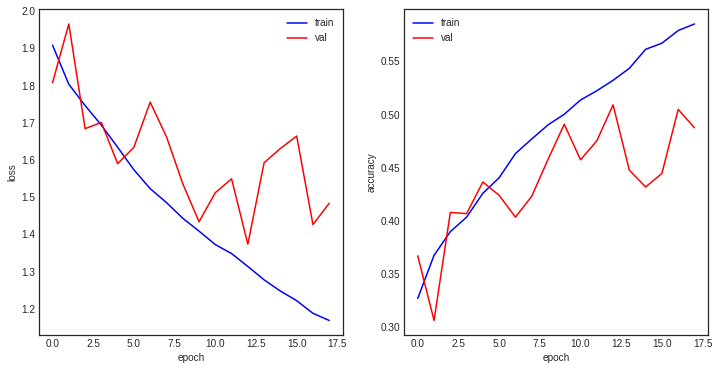

In [13]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].plot(history.history['loss'], 'b-')
axes[0].plot(history.history['val_loss'], 'r-')
axes[0].legend(['train', 'val'])
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')

axes[1].plot(history.history['accuracy'], 'b-')
axes[1].plot(history.history['val_accuracy'], 'r-')
axes[1].legend(['train', 'val'])
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')

plt.show()

In [14]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3723 - accuracy: 0.5093


[1.3722838163375854, 0.5092999935150146]